# Word2Vec

In [9]:
import nltk

from gensim.models import Word2Vec
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import re

paragraph = """The education sector in India is divided into primary, higher secondary, 
                senior secondary and vocational education sections. Schools are regulated by NCERT.
                The National Council of Educational Research and Training (NCERT) is the apex body for
                curriculum related matters for school education in India.
                It provides sup of schools in India.Despite this robust network, the foundation of Indian 
                education is shaky. It is lacking in both its outreach and content. Primary education has
                been made free and compulsory for all children upto the age of 14 years, under the Right To 
                Education, but many children in rural and remote areas still don’t have access to it. 
                In schools that have been established, appropriate infrastructure is lacking.
                The Mid-Day Meal Scheme of the government was a good initiative to lure rural children to schools, 
                but in some areas, the quality of
                food provided was found to be sub-standard."""

In [10]:
# Preprocessing the data 
text = re.sub(r'\[[0-9]*\]',' ',paragraph)
text = re.sub(r'\s+',' ',text)

text = text.lower()

text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)
text =text.replace('.', '')

# Sentence Tokenisation

In [11]:
# Preparing the dataset
sentences = nltk.sent_tokenize(text)
sentences

['the education sector in india is divided into primary, higher secondary, senior secondary and vocational education sections schools are regulated by ncert the national council of educational research and training (ncert) is the apex body for curriculum related matters for school education in india it provides sup of schools in indiadespite this robust network, the foundation of indian education is shaky it is lacking in both its outreach and content primary education has been made free and compulsory for all children upto the age of years, under the right to education, but many children in rural and remote areas still don’t have access to it in schools that have been established, appropriate infrastructure is lacking the mid-day meal scheme of the government was a good initiative to lure rural children to schools, but in some areas, the quality of food provided was found to be sub-standard']

# Word Tokenization

In [12]:
sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]

In [13]:
sent_word

[['the',
  'education',
  'sector',
  'in',
  'india',
  'is',
  'divided',
  'into',
  'primary',
  ',',
  'higher',
  'secondary',
  ',',
  'senior',
  'secondary',
  'and',
  'vocational',
  'education',
  'sections',
  'schools',
  'are',
  'regulated',
  'by',
  'ncert',
  'the',
  'national',
  'council',
  'of',
  'educational',
  'research',
  'and',
  'training',
  '(',
  'ncert',
  ')',
  'is',
  'the',
  'apex',
  'body',
  'for',
  'curriculum',
  'related',
  'matters',
  'for',
  'school',
  'education',
  'in',
  'india',
  'it',
  'provides',
  'sup',
  'of',
  'schools',
  'in',
  'indiadespite',
  'this',
  'robust',
  'network',
  ',',
  'the',
  'foundation',
  'of',
  'indian',
  'education',
  'is',
  'shaky',
  'it',
  'is',
  'lacking',
  'in',
  'both',
  'its',
  'outreach',
  'and',
  'content',
  'primary',
  'education',
  'has',
  'been',
  'made',
  'free',
  'and',
  'compulsory',
  'for',
  'all',
  'children',
  'upto',
  'the',
  'age',
  'of',
  'yea

In [14]:
#sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]

for i in range(len(sent_word)):
    sent_word[i] = [word for word in sent_word[i]
                    if word not in stopwords.words('english')]

In [15]:
sent_word

[['education',
  'sector',
  'india',
  'divided',
  'primary',
  ',',
  'higher',
  'secondary',
  ',',
  'senior',
  'secondary',
  'vocational',
  'education',
  'sections',
  'schools',
  'regulated',
  'ncert',
  'national',
  'council',
  'educational',
  'research',
  'training',
  '(',
  'ncert',
  ')',
  'apex',
  'body',
  'curriculum',
  'related',
  'matters',
  'school',
  'education',
  'india',
  'provides',
  'sup',
  'schools',
  'indiadespite',
  'robust',
  'network',
  ',',
  'foundation',
  'indian',
  'education',
  'shaky',
  'lacking',
  'outreach',
  'content',
  'primary',
  'education',
  'made',
  'free',
  'compulsory',
  'children',
  'upto',
  'age',
  'years',
  ',',
  'right',
  'education',
  ',',
  'many',
  'children',
  'rural',
  'remote',
  'areas',
  'still',
  '’',
  'access',
  'schools',
  'established',
  ',',
  'appropriate',
  'infrastructure',
  'lacking',
  'mid-day',
  'meal',
  'scheme',
  'government',
  'good',
  'initiative',
  'lure

In [16]:
# Training the Word2Vec model
model = Word2Vec(sent_word, min_count=1)


words = model.wv.vocab

In [17]:
# Test the word vectors
vector = model.wv['government']

print(vector)

[-3.6967301e-03  4.0875883e-03 -7.2633359e-04 -1.9123792e-03
 -4.1785003e-03 -8.7760913e-05 -1.9223661e-03  1.2126769e-03
 -2.4797481e-03 -4.0739370e-03  1.7220561e-03 -4.3145027e-03
  4.8334110e-03 -3.4518985e-03  1.1314195e-04  3.2567473e-03
  4.1384217e-03 -2.5978512e-03  2.8784403e-03 -4.1123363e-03
 -1.6836211e-03  4.6734517e-03  4.6337862e-03 -8.8904047e-04
  3.9132065e-03 -4.6595708e-03  8.5776532e-04  2.1756096e-03
 -2.8310169e-03 -4.2124926e-03 -3.4296724e-03  3.9162720e-03
  1.9733321e-03  1.2429528e-03 -3.4510959e-03 -1.6840630e-03
  3.2576281e-03 -1.6199894e-03  1.9184490e-03  4.2866990e-03
  1.3671920e-03 -9.5947913e-04 -4.6993885e-03 -9.3191303e-04
 -4.8907553e-03  5.9576886e-04  4.7195381e-03  2.7447545e-03
 -8.3775556e-04 -2.1703914e-03  1.4849770e-03 -1.0256292e-03
  3.1464405e-03 -4.8247590e-03 -4.9607474e-03  2.8103564e-03
  1.3030131e-03  2.1813144e-03 -2.1047753e-03 -2.5662943e-03
  4.7614248e-03 -1.8378700e-03  1.1900607e-03  9.3405681e-05
 -4.8644122e-04 -5.93669

In [18]:
# Most similar words
similar = model.wv.most_similar('education',topn=20)

similar

[('areas', 0.17972195148468018),
 ('senior', 0.1626434028148651),
 ('outreach', 0.16013360023498535),
 ('initiative', 0.15531790256500244),
 ('network', 0.14470237493515015),
 ('mid-day', 0.140386700630188),
 ('remote', 0.1392933428287506),
 ('robust', 0.13927942514419556),
 ('primary', 0.12172558903694153),
 ('appropriate', 0.1216319277882576),
 ('content', 0.10937345027923584),
 ('many', 0.10808950662612915),
 ('found', 0.09972022473812103),
 ('sections', 0.09565338492393494),
 ('years', 0.0945359393954277),
 ('shaky', 0.09249469637870789),
 ('body', 0.09145476669073105),
 ('quality', 0.08287916332483292),
 ('provided', 0.07062883675098419),
 ('upto', 0.0703202486038208)]

In [19]:
# checking words similarity 
model.wv.similarity(w1='meal',w2='food')

0.10366354673990871

In [20]:
# Same words similarity
model.wv.similarity(w1='india',w2='india')

0.9999999999999998

In [21]:
# filter on non similarity
model.wv.doesnt_match(["government","india","education"])

C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:730: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'education'

C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


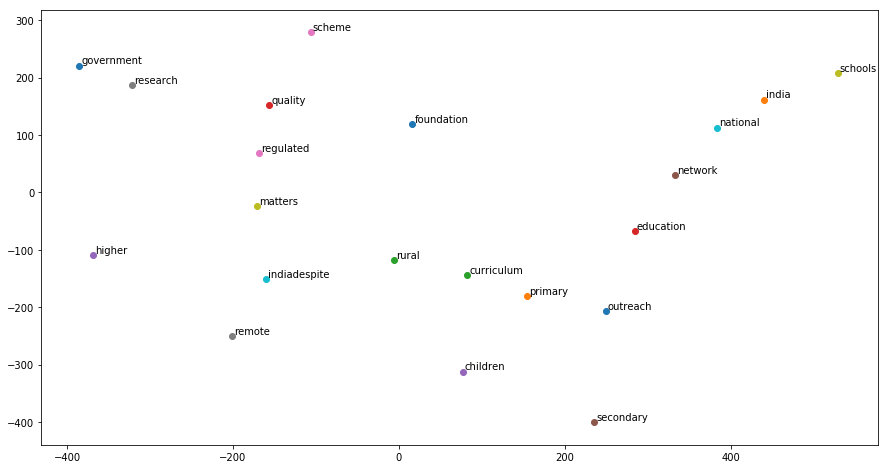

In [23]:
from sklearn.manifold import  TSNE
vocab = ['government','india','curriculum','education','children','network', 'scheme','remote','schools','national','foundation','primary','rural','quality','higher','secondary','regulated','research','matters','indiadespite','outreach']
def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points', ha='left')

    plt.show()

tsne_plot(model)

# Conclusion :-
We have tried to use word2vec on education system on india , we have removed the special character , 0-9 digits and stopwords to have the data cleaned and ready for our vectorization .
We have analysed the similar and dissimilar words using word2vec and at last we have plotted the 2d graph for 20 features for similarity visualisation.